<a href="https://colab.research.google.com/github/NayanaPradeep/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM**

Data includes airline reviews from 2006 to 2019 for popular airlines around the world with
multiple choice and free text questions. Data is scraped in Spring 2019. The main objective
is to predict whether passengers will refer the airline to their friends.

Feature descriptions briefly as follows:

*   airline: Name of the airline
*   overall: Overall point is given to the trip between 1 to 10.
*   author: Author of the trip
*   reviewdate: Date of the Review customer review: Review of the customers in  free text format 
*   aircraft: Type of the aircraft
*   travellertype: Type of traveler (e.g. business, leisure)
*   cabin: Cabin at the flight date flown: Flight date
*   seatcomfort: Rated between 1-5
*   cabin service: Rated between 1-5
*   foodbev: Rated between 1-5 entertainment: Rated between 1-5
*   groundservice: Rated between 1-5
*   valueformoney: Rated between 1-5
*   recommended: Binary, target variable


# **SOLUTION**

In [ ]:
#Import the necessary libraries

import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from scipy.stats import zscore
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [ ]:
#Mount the drive to load the dataset 
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the file
file_path = '/content/drive/MyDrive/Colab Notebooks/Airline Passenger Referral Prediction - Nayana Pradeep/data_airline_reviews.xlsx'
airline_df=pd.read_excel(file_path)

In [ ]:
#Top 10 rows of the dataset
airline_df.head(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
#Last 5 rows of the dataset
airline_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [ ]:
#Column names of the dataset
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
#Number of rows and column
airline_df.shape

(131895, 17)

In [ ]:
#Checking the unique values of the  recommended column(target variable)
airline_df.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

In [ ]:
#Checking the types of travellers who submitted the review
airline_df.traveller_type.unique()

array([nan, 'Business', 'Family Leisure', 'Solo Leisure',
       'Couple Leisure'], dtype=object)

From the last 5 rows, we can conclude that the dataset contains null values. Lets check the number of null values present for each of the columns. 

In [ ]:
#Checking the null value count for each column
airline_df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

In [ ]:
#Checking the percentage of null value for each column
percent_missing = airline_df.isnull().sum() * 100 / len(airline_df)
missing_values_df = pd.DataFrame({'column_name': airline_df.columns,'percent_missing': percent_missing})
missing_values_df.sort_values('percent_missing',ascending=False)

,column_name,percent_missing
aircraft,aircraft,85.050229
ground_service,ground_service,70.159597
date_flown,date_flown,69.951097
route,route,69.880587
traveller_type,traveller_type,69.858600
entertainment,entertainment,66.493802
food_bev,food_bev,60.113727
seat_comfort,seat_comfort,53.992949
cabin_service,cabin_service,53.967171
cabin,cabin,52.005004


From the above analysis, it is clear that our dataset contains lot of null values. Since 'recommended' is the target variable here, lets concentrate the null value count of 'recommended' first.

Let's check the subset of the dataset which has null values for 'recommended'

In [ ]:
#Creating a copy before the data preparation and analysis
airline_df_copy =airline_df.copy()

In [ ]:
#new dataset with rows where recommended is null
recommended_null = airline_df[airline_df['recommended'].isnull()]

In [ ]:
#checking the null count for this particular subset
recommended_null.isnull().sum()

airline            65948
overall            65968
author             65948
review_date        65948
customer_review    65948
aircraft           67454
traveller_type     67454
cabin              67454
route              67454
date_flown         67455
seat_comfort       67455
cabin_service      67455
food_bev           67455
entertainment      67455
ground_service     67455
value_for_money    67455
recommended        67455
dtype: int64

Now it's clear that the subset with null values for 'recommended' column comes with approximately same amount of null values for the other columns.

This subset of dataset can corrupt the analysis and prediction because it is almost full of null values. So it is safer to remove these columns from the original dataset

In [ ]:
#Number of rows and columns in this subset dataset
recommended_null.shape

(67455, 17)

In [ ]:
#remove the rows where recommended value is null
airline_df.drop(airline_df[airline_df['recommended'].isnull()].index, inplace = True)

In [ ]:
#Number of rows and columns of the improved and new dataset
airline_df.shape

(64440, 17)

In [ ]:
#Checking the number of duplicates in the dataset
len(airline_df[airline_df.duplicated( keep='first')])

4679

In [ ]:
#Removing the duplicates
airline_df.drop_duplicates(keep='first', inplace = True)

In [ ]:
#confirming that the duplicate rows are deleted
len(airline_df[airline_df.duplicated( keep='first')])

0

In [ ]:
#Checking the null count of the improved dataset
airline_df.isnull().sum()

airline                0
overall             1764
review_date            0
customer_review        0
aircraft           41274
traveller_type     22222
cabin               1057
route              22249
date_flown         22327
seat_comfort        3550
cabin_service       3521
food_bev           11420
entertainment      19531
ground_service     22592
value_for_money      434
recommended            0
dtype: int64

In [ ]:
#Checking the new null value percentage
percent_missing = airline_df.isnull().sum() * 100 / len(airline_df)
missing_values_df = pd.DataFrame({'column_name': airline_df.columns,'percent_missing': percent_missing})
missing_values_df.sort_values('percent_missing',ascending=False)

,column_name,percent_missing
aircraft,aircraft,69.065109
ground_service,ground_service,37.803919
date_flown,date_flown,37.360486
route,route,37.229966
traveller_type,traveller_type,37.184786
entertainment,entertainment,32.681849
food_bev,food_bev,19.109453
seat_comfort,seat_comfort,5.940329
cabin_service,cabin_service,5.891802
overall,overall,2.951758


In [ ]:
#checking the number of unique aircrafts
airline_df.aircraft.nunique()

array([nan, 'A330', 'Boeing 737-800 / A330-300', ...,
       'Boeing 737-800 and Embraer 190', 'Boeing 737-400/ 737-800',
       'boeing 767'], dtype=object)

In [ ]:
#airline_df['aircraft'].fillna('Aircraft_Name_NA',inplace = True)

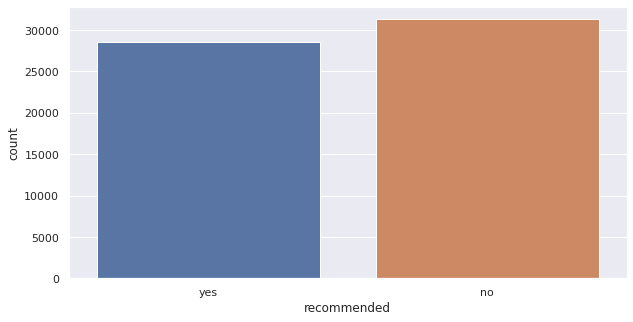

In [ ]:
#Visualizing the recommendation count 
plt.figure(figsize=(10,5))
sns.countplot(x = 'recommended', data = airline_df)

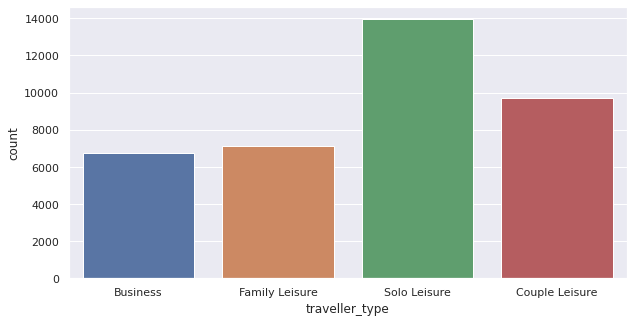

In [ ]:
#Count of each type of travellers
plt.figure(figsize=(10,5))
sns.countplot(x = 'traveller_type', data = airline_df)

As author is the name of the reviewer and doesnt contribute anything significant to the prediction, we can drop this column.

In [ ]:
#Dropping the author column
airline_df.drop(["author"], axis = 1, inplace = True)

In [ ]:
#Checking the shape of improved dataset
airline_df.shape

(59761, 16)

In [ ]:
#Checking the full text of customer review from the first column to have an understanding of how it looks
airline_df.iloc[0,:]['customer_review']

'âœ… Trip Verified | London to Izmir via Istanbul. First time Iâ€™d flown TK. I found them very good in the air, cabin crew, planes, food, all very nice. Not so great on the ground, ground staff, call centre, computer systems. My flight from LHR was delayed so I missed the connection in Istanbul. Most ground staff donâ€™t speak English, and I was given contradictory instructions from those that could speak a little English. I eventually got on a flight to Izmir three hours later, but it wasnâ€™t an easy process, made worse by the vast distances one has to walk between gates in the cavernous new airport. Also, Iâ€™d phoned a TK call centre (based in Ukraine) to pay an extra Â£40 or so each way for extra leg room seats. However, as the departure times kept changing, my seats kept changing, and for the return leg to London from Istanbul I was not given an extra leg room seat. Luckily there was a spare exit row seat and the cabin crew sorted me out. Overall, I think their cabin crew and pl

In [ ]:
#Checking the route column and customer_review column side by side
airline_df[['route','customer_review']].head(20)

,route,customer_review
1,London to Izmir via Istanbul,âœ… Trip Verified | London to Izmir via Istanb...
3,Istanbul to Bucharest,âœ… Trip Verified | Istanbul to Bucharest. We ...
5,Rome to Prishtina via Istanbul,âœ… Trip Verified | Rome to Prishtina via Ista...
7,Washington Dulles to Karachi,âœ… Trip Verified | Flew on Turkish Airlines I...
9,Mumbai to Dublin via Istanbul,âœ… Trip Verified | Mumbai to Dublin via Istan...
11,Istanbul to Budapest via Dublin,âœ… Trip Verified | Istanbul to Budapest via D...
13,Istanbul to Algiers,"âœ… Trip Verified | Istanbul to Algiers, plann..."
15,Basel to Cape Town via Istanbul,âœ… Trip Verified | Basel to Cape Town via Ist...
17,Abu Dhabi to Luxembourg via Istanbul,Not Verified | Abu Dhabi to Luxembourg via Ist...
19,Venice to Boston via Istanbul,âœ… Trip Verified | The experience with Turkis...


In [ ]:
#Checking the route in the third column
airline_df.iloc[2,:]['route']

'Rome to Prishtina via Istanbul'

In [ ]:
#Checking the full text of customer review from the third column to have an understanding of how it looks
airline_df.iloc[2,:]['customer_review']

'âœ… Trip Verified | Rome to Prishtina via Istanbul. I flew with this company several times in the past years, and I can honestly say that it is getting worse and worse. I flew from Rome to Prishtina via Istanbul, all 4 flights had a delay (which apparently is pretty normal with Turkish). The ground staff is for the most part useless. In Istambul i have tried to ask a few information about a flight delay (i had just 30 minutes before the connecting flight) and the whole answer was: "Relax Sir, No problem Sir, It\'s okay". The new airport is a gigantic mess, very big and disorganized. When you land in Istanbul it takes about 20 to 25 minutes taxiing and other 10 minutes before they actually start disembarking, it\'s an exhausting experience especially if you are in a hurry. Forget about asking for some indication at the new airport, they all chat between each other, some with a coffee in their hands. I flew with four different aircraft on this trip, two were fairly new, the other two we

In [ ]:
#Checking the route in the 10th column from the last
airline_df.iloc[10,:]['route']

'New York to Erbil via Istanbul'

In [ ]:
#Checking the full text of customer review in the 10th column from the last
airline_df.iloc[10,:]['customer_review']

'Not Verified | New York to Erbil via Istanbul. They have the worst customer service. My initial leg was delayed due to weather so I was going to miss my connection. Turkish Airlines did nothing to help - in fact finding someone with Turkish Airlines to assist is a feat in itself. TA kept passing the blame. Bottom line - if any segment of your Turkish Airlines flights causes a delay then you are SOL when it comes to TA. Plan on spending a lot more money and flying another airline because Turkish Airlines will not assist you and they will keep your money. The "customer service" is a joke - they read from scripts and keep repeating the same paragraph - almost like robots. They also tell you to send an email - it is just a stalling tactic.'

It's clear that the first part of the customer review before the full stop (.) contains the trip route and status. Since we already have another column with route details, this part is not required in the review. We can cut this part of the customer review after checking the trip status details too.

In [ ]:
#Checking the number of trip verified mentions in the customer review column.
ver_count=airline_df['customer_review'].str.contains('Trip Verified').sum()
print ("There are {v} verified trips".format(v=ver_count))

There are 13260 verified trips


In [ ]:
#Checking the number of not verified mentions in the customer review column.
not_ver_count=airline_df['customer_review'].str.contains('Not Verified').sum()
print ("{v} trips are not verified".format(v=not_ver_count))

1744 trips are not verified


In [ ]:
#total number of rows
len(airline_df.index)

59761

In [ ]:
#calculating the number of rows with no information regarding trip verification status
no_info = len(airline_df.index)- (ver_count + not_ver_count )
print ("Verification details missing for {nf} trips".format(nf=no_info))

The number of customer reviews which doesn't mention the trip verification status is huge by a big margin compared to the ones which mention the verification status. So it is not worth moving this part to another column.

In [ ]:
#Removing the part of customer review whihc mentions route and trip verification status
airline_df['customer_review'] = airline_df['customer_review'].str.split('.',n=1,expand=True)[1]

In [ ]:
#Checking the change in same row which we checked before
airline_df.iloc[10,:]['customer_review']

' They have the worst customer service. My initial leg was delayed due to weather so I was going to miss my connection. Turkish Airlines did nothing to help - in fact finding someone with Turkish Airlines to assist is a feat in itself. TA kept passing the blame. Bottom line - if any segment of your Turkish Airlines flights causes a delay then you are SOL when it comes to TA. Plan on spending a lot more money and flying another airline because Turkish Airlines will not assist you and they will keep your money. The "customer service" is a joke - they read from scripts and keep repeating the same paragraph - almost like robots. They also tell you to send an email - it is just a stalling tactic.'

These customer reviews in words give out lot of sentiments. This could be one of major deciding factors for recommendation .So let's work on these reviews.

Sentiment analysis is part of the Natural Language Processing (NLP) techniques that consists in extracting emotions related to some raw texts.

Lets apply this to our customer review column.

In [ ]:
#Replacing all the null values of customer review column with 'NA'
airline_df['customer_review'].fillna('NA',inplace = True)

In [ ]:
#importing all the libraries required for sentiment analysis
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#downloading all the required packages
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download("wordnet")
nltk.download('vader_lexicon')


In [ ]:
# return the wordnet object value corresponding to the POS tag
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#Including all the techniques for cleaning the text in a single function
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [ ]:
#Clean the customer_review column texts for sentiment analysis
airline_df["customer_review"] = airline_df["customer_review"].apply(lambda x: clean_text(x))

In [ ]:
#checking one of the clean texts from one of the customer review columns
airline_df.iloc[10,:]['customer_review']

'worst customer service initial leg delay due weather go miss connection turkish airline nothing help fact find someone turkish airline assist feat ta keep pass blame bottom line segment turkish airline flight cause delay sol come ta plan spending lot money fly another airline turkish airline assist keep money customer service joke read script keep repeat paragraph almost like robot also tell send email stalling tactic'

In [ ]:
#Make new columns for the negativity, positivity and neutrality derived from the sentiment analysis 
sid = SentimentIntensityAnalyzer()
airline_df["review_Sentiments"] = airline_df["customer_review"].apply(lambda x: sid.polarity_scores(x))
airline_df = pd.concat([airline_df.drop(['review_Sentiments'], axis=1), airline_df['review_Sentiments'].apply(pd.Series)], axis=1)


In [ ]:
#Rename the new columns for more readability
airline_df.rename(columns={'neg':'Negative Sentiment Score', 'pos':'Positive Sentiment Score' ,
                           'neu' : 'Neutal Sentiment Score' , 'compound':'Overall Sentiment Score'}, inplace=True)

In [ ]:
#Calculating the overall customer review sentiments
airline_df["Overall Review Sentiment"] = np.where(airline_df["Overall Sentiment Score"] >= 0.05,"Positive",
                                                       np.where(airline_df["Overall Sentiment Score"] <= -0.05,"Negative","Neutral"))


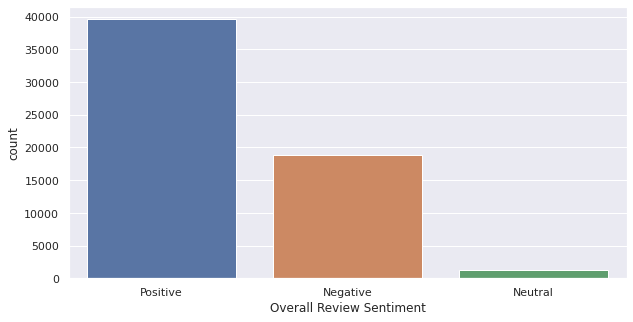

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Overall Review Sentiment', data = airline_df)

In [ ]:
#Lets split this dataset into three with respect to the overall review sentiment for some analysis
overall_positive= airline_df_copy[airline_df_copy["Overall Review Sentiment"] == "Positive"]
overall_negative= airline_df_copy[airline_df_copy["Overall Review Sentiment"] == "Negative"]
overall_neutral= airline_df_copy[airline_df_copy["Overall Review Sentiment"] == "Neutral"]

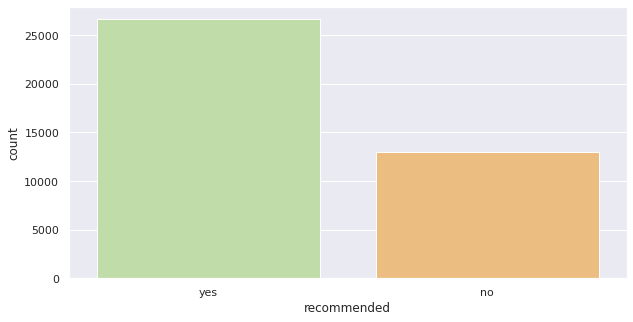

In [ ]:
#Comparing the overall review sentiment positivity to the recommendation
plt.figure(figsize=(10,5))
sns.countplot(x = 'recommended', data = overall_positive , palette = "Spectral_r")

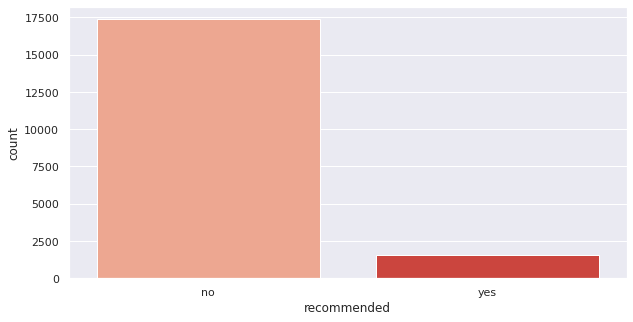

In [ ]:
#Comparing the overall review sentiment negativity to the recommendation
plt.figure(figsize=(10,5))
sns.countplot(x = 'recommended', data = overall_negative , palette = "Reds")

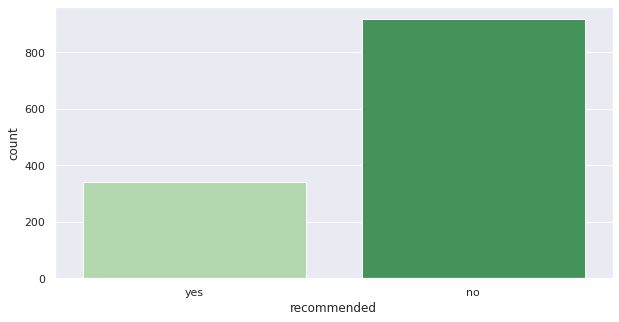

In [ ]:
#Comparing the overall review sentiment neutrality to the recommendation
plt.figure(figsize=(10,5))
sns.countplot(x = 'recommended', data = overall_neutral , palette = "Greens")